**Name:** *Joanne Li*

# Lecture 2: Data Cleaning and Exploration [100 points]

**Chronic Kidney Disease** (CKD) or Kidney Failure, is a condition in which kidney functioning deteriorates and can no longer adequatly remove toxins or fluids from the blood.  It can be caused by several conditions including diabetes, hypertension and inherited genetic conditions. Symptoms of advanced CKD include fatigue, nausea and edema. The condition is can be fatal without a kidney transplant or dialysis.

We have given you a Comma Separated Values (CSV) file `ckd_ibmds.csv` containing a **cross-sectional** clinical dataset of 400 patients.  The data comes from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) and was created by Soundarapandian *et al.*  We will use the **`pandas`** data science module which is specialized for working with tabular data sets through it's primary class the **DataFrame**.  Run the following cell to import the module

In [1]:
import pandas as pd
pd.options.display.max_columns = None # Tell pandas to display all columns
print("Pandas has been imported!")

Pandas has been imported!


Excel spreadsheets can be read using the `pd.read_xlsx` while CSV files can be read using `pd.read_csv`
* If you are using in Google Colab, upload `ckd_ibmds.csv` to Google Drive.
* Otherwise if working locally, place the file in the same folder as this notebook

We can then use `pd.read_csv` to read the file into a Dataframe called `df0` then display it

In [2]:
# try:
#     import os
#     from google.colab import drive
#     drive.mount("/content/drive/")
#     os.chdir("/content/drive/My Drive/")
# except:
#     pass

""" Write your code here """
df0 = pd.read_csv("L02data\ckd_ibmds.csv")

# Data Exploration
One handy tool for DataFrame objects is called `.head(N)` that will return the first N rows of the DataFrame. So, `print(df0.head(N))` would print the first N rows of your DataFrame.  Use the `.head` method to display the first 10 rows.

In [3]:
""" Write your code here """

df0.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd



By convention each column represents a **feature** while each row represents an observation.  In this dataset each datapoint is an individual subject.
Features can be **numerical** or **categorical**. For example the `age`, `sod` and `rbcc` are numerical.  `rbc`, `appet`, `class` are categroical. Notice how some entries contain `NaN`.  This is an abreaviation for *Not a Number* and is used to represent **missing values**.

The `.describe()` method is provides descriptive statistics for numerical features.  Notice how the count is less than 400 because missing entries are excluded.

In [4]:
""" Write your code here """
df0.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


We can display the relationships between a some of the features using `seaborn`

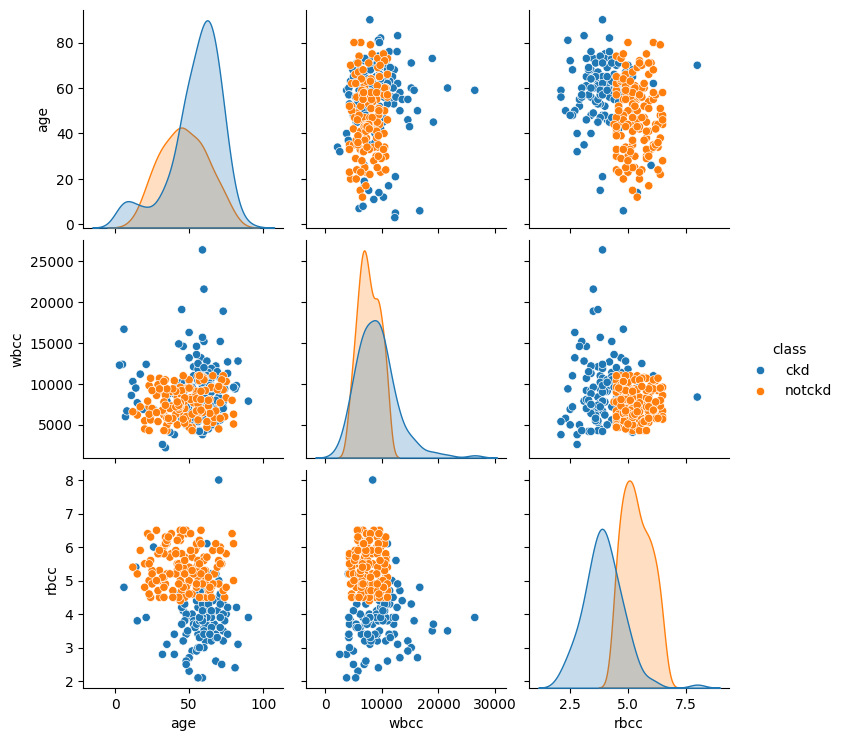

In [5]:
import seaborn as sns

""" Write your code here """
sns.pairplot(df0, hue="class", vars=["age", "wbcc", "rbcc"])

You can use square brackets to index the data frame by a specific column

In [6]:
""" Write your code here """
df0["rbcc"]

0      5.2
1      NaN
2      NaN
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: rbcc, Length: 400, dtype: float64

Use conditionals to extract a entries meeting a condition

In [7]:
""" Write your code here """
df0[df0['age'] > 50]
#df0[df0['class'] == "cdk"]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36.0,NaN,NaN,no,no,no,good,no,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,51.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,94.0,15.0,1.2,144.0,3.7,15.5,46.0,9500.0,6.4,no,no,no,good,no,no,notckd
390,52.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,99.0,25.0,0.8,135.0,3.7,15.0,52.0,6300.0,5.3,no,no,no,good,no,no,notckd
392,57.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,133.0,48.0,1.2,147.0,4.3,14.8,46.0,6600.0,5.5,no,no,no,good,no,no,notckd
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,notckd


Use `.groupby` method to report averages for specific groups such as those with Diabetes Mellitus

In [8]:
""" Write your code here """
df0.groupby('dm').mean(numeric_only=True)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
dm,,,,,,,,,,,,,,
no,46.890625,74.246032,1.018980,0.653061,0.077551,117.524017,45.729675,2.202429,139.698113,4.469811,13.554386,42.000000,8033.333333,5.069945
yes,60.278195,80.820896,1.013632,1.869159,1.336538,204.816000,79.381203,4.705597,132.823232,4.962245,10.483898,32.317757,9208.791209,3.907143


We can use `.loc` method to extract specific entry from the above dataframe

In [9]:
""" Write your code here """
len(df0) # number of rows in the dataframe
len(df0[df0["dm"] == "yes"]) # number of subjects with dm
                             # filter the dataframe to only those with dm and then count the rows

numDm = sum(df0["dm"] == "yes") # number of subjects with dm
                                # sum of the trues in the boolean array

dmMeansDf = df0.groupby("dm").mean(numeric_only=True)
meanAgeDm = dmMeansDf.loc["yes","age"] # average age of subjects with dm
                                       # get the row for dm=="yes" and then the age column
                                       
print(f"{numDm} subjects have diabetes and their average age is {meanAgeDm:0.1f}")

137 subjects have diabetes and their average age is 60.3


  ### Activity 1 [30 points]
   * Report the number of subjects and then display the numbers with and without CKD in the format [10 points]
   ```
   There are N subjects and X have CKD while Y do not
   ```

  

In [10]:
""" Write your code here """
num_subjects = len(df0)
num_subjects_ckd = sum(df0["class"] == "ckd") ## sum of trues
num_subjects_notckd = sum(df0["class"] == "notckd")

print(f"There are {num_subjects} and {num_subjects_ckd} have CKD while {num_subjects_notckd} do not")

There are 400 and 250 have CKD while 150 do not


   * Show the averages of numeric columns grouped by whether subject has CKD or not [10 points]


In [11]:
""" Write your code here """
df0.groupby('class').mean(numeric_only=True)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
class,,,,,,,,,,,,,,
ckd,54.541322,79.625000,1.013918,1.722488,0.76699,175.419811,72.389030,4.414916,133.901786,4.878443,10.647549,32.939891,9069.536424,3.945238
notckd,46.516779,71.351351,1.022414,0.000000,0.00000,107.722222,32.798611,0.868966,141.731034,4.337931,15.188194,46.335616,7705.594406,5.379021


   * Report the average age of subjects with CKD vs those that don't rounded to one decimal place [10 points]
   ```
   Average age of subjects with CKD is X and without is Y
   ```

In [12]:
""" Write your code here """
classMeansDf = df0.groupby('class').mean(numeric_only=True)
meanAgeCkd = classMeansDf.loc["ckd","age"]
meanAgeNotCkd = classMeansDf.loc["notckd","age"]
print(f"Average of subject with CKD is {meanAgeCkd:0.1f} and without is {meanAgeNotCkd:0.1f}")


Average of subject with CKD is 54.5 and without is 46.5


# Data Cleaning

In data science **Data Cleaning** is the process of removing or replacing invalid entries from the data set.  Display the dataframe and notice that many columns are missing values


In [13]:
""" Write your code here """
df0

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


Let's replace missing values blood pressure values with the mean of the entire dataset.

In [14]:
""" Write your code here """
df0['bp'].fillna(df0['bp'].mean(), inplace=True) # fill NaNs with the mean of the column

The sodium (`sod`) levels depend greatly on the whether the patient has CKD or not.  So we replace missing values here with the mean of the subjects diagnostic group.

In [15]:
""" Write your code here """
meanSod = df0.groupby('class').mean(numeric_only=True)

meanSodCkd = meanSod.loc["ckd","sod"]
meanSodNotCkd = meanSod.loc["notckd","sod"]

df0.loc[df0['class'] == "ckd", 'sod'] = df0.loc[df0['class'] == "ckd", 'sod'].fillna(meanSodCkd)
df0.loc[df0['class'] == "notckd", 'sod'] = df0.loc[df0['class'] == "notckd", 'sod'].fillna(meanSodNotCkd)

df0.head(10)

##########################


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.000000,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,133.901786,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.000000,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,133.901786,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.000000,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,133.901786,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.000000,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.000000,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.000000,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,133.901786,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.000000,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.000000,3.2,12.2,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.000000,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.000000,4.0,12.4,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,76.469072,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,133.901786,NaN,12.4,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.000000,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,133.901786,NaN,10.8,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.000000,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.000000,3.7,9.5,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


Finally we drop any other subjects with missing values from the data frame

In [16]:
""" Write your code here """
df0.dropna()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


## Activity 2 [70 points]
**Alzheimer's Disease (AD)** is a progressive neurological disorder that affects the brain, leading to memory loss, impaired thinking, and changes in behavior.  We have given you `ad_ibmds.csv` which contains a tabular dataset of demographics, cognitive tests and MRI-derived features for over 400 adult subjects from the OASIS study of AD ([Marcus et al. 2007](
https://doi.org/10.1162/jocn.2007.19.9.1498)).

* Read the dataset into a dataframe and display it [10 points]

In [17]:
""" Write your code here """

df1 = pd.read_csv("L02data\\ad_ibmds.csv")   # \a is a special character
df1

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


* Display descriptive statistics for this data set [10 points]

In [18]:
""" Write your code here """
df1.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


* Report the number of subjects in the format [10 points]
```
There are N subjects
```

In [19]:
""" Write your code here """
print(f"There are {len(df1)} subjects.")

There are 436 subjects.


* Clean the dataset by first removing the `Delay` column and then dropping any other subjects with missing values.  Then report the number of subjects in the format [10 points]
```
After cleaning there are N subjects
```

In [20]:
""" Write your code here """
df1 = df1.drop(columns=["Delay"])
df1 = df1.dropna()

print(f"After cleaning there are {len(df1)} subjects")

After cleaning there are 216 subjects


* The **Clinical Dementia Rating** in the `CDR` column contains the diagnosis of each subject, from 0 indicating no dementia to 3 indicating severe dementia. Display a pair plot of the other numeric features colored by the `CDR` [10 points]

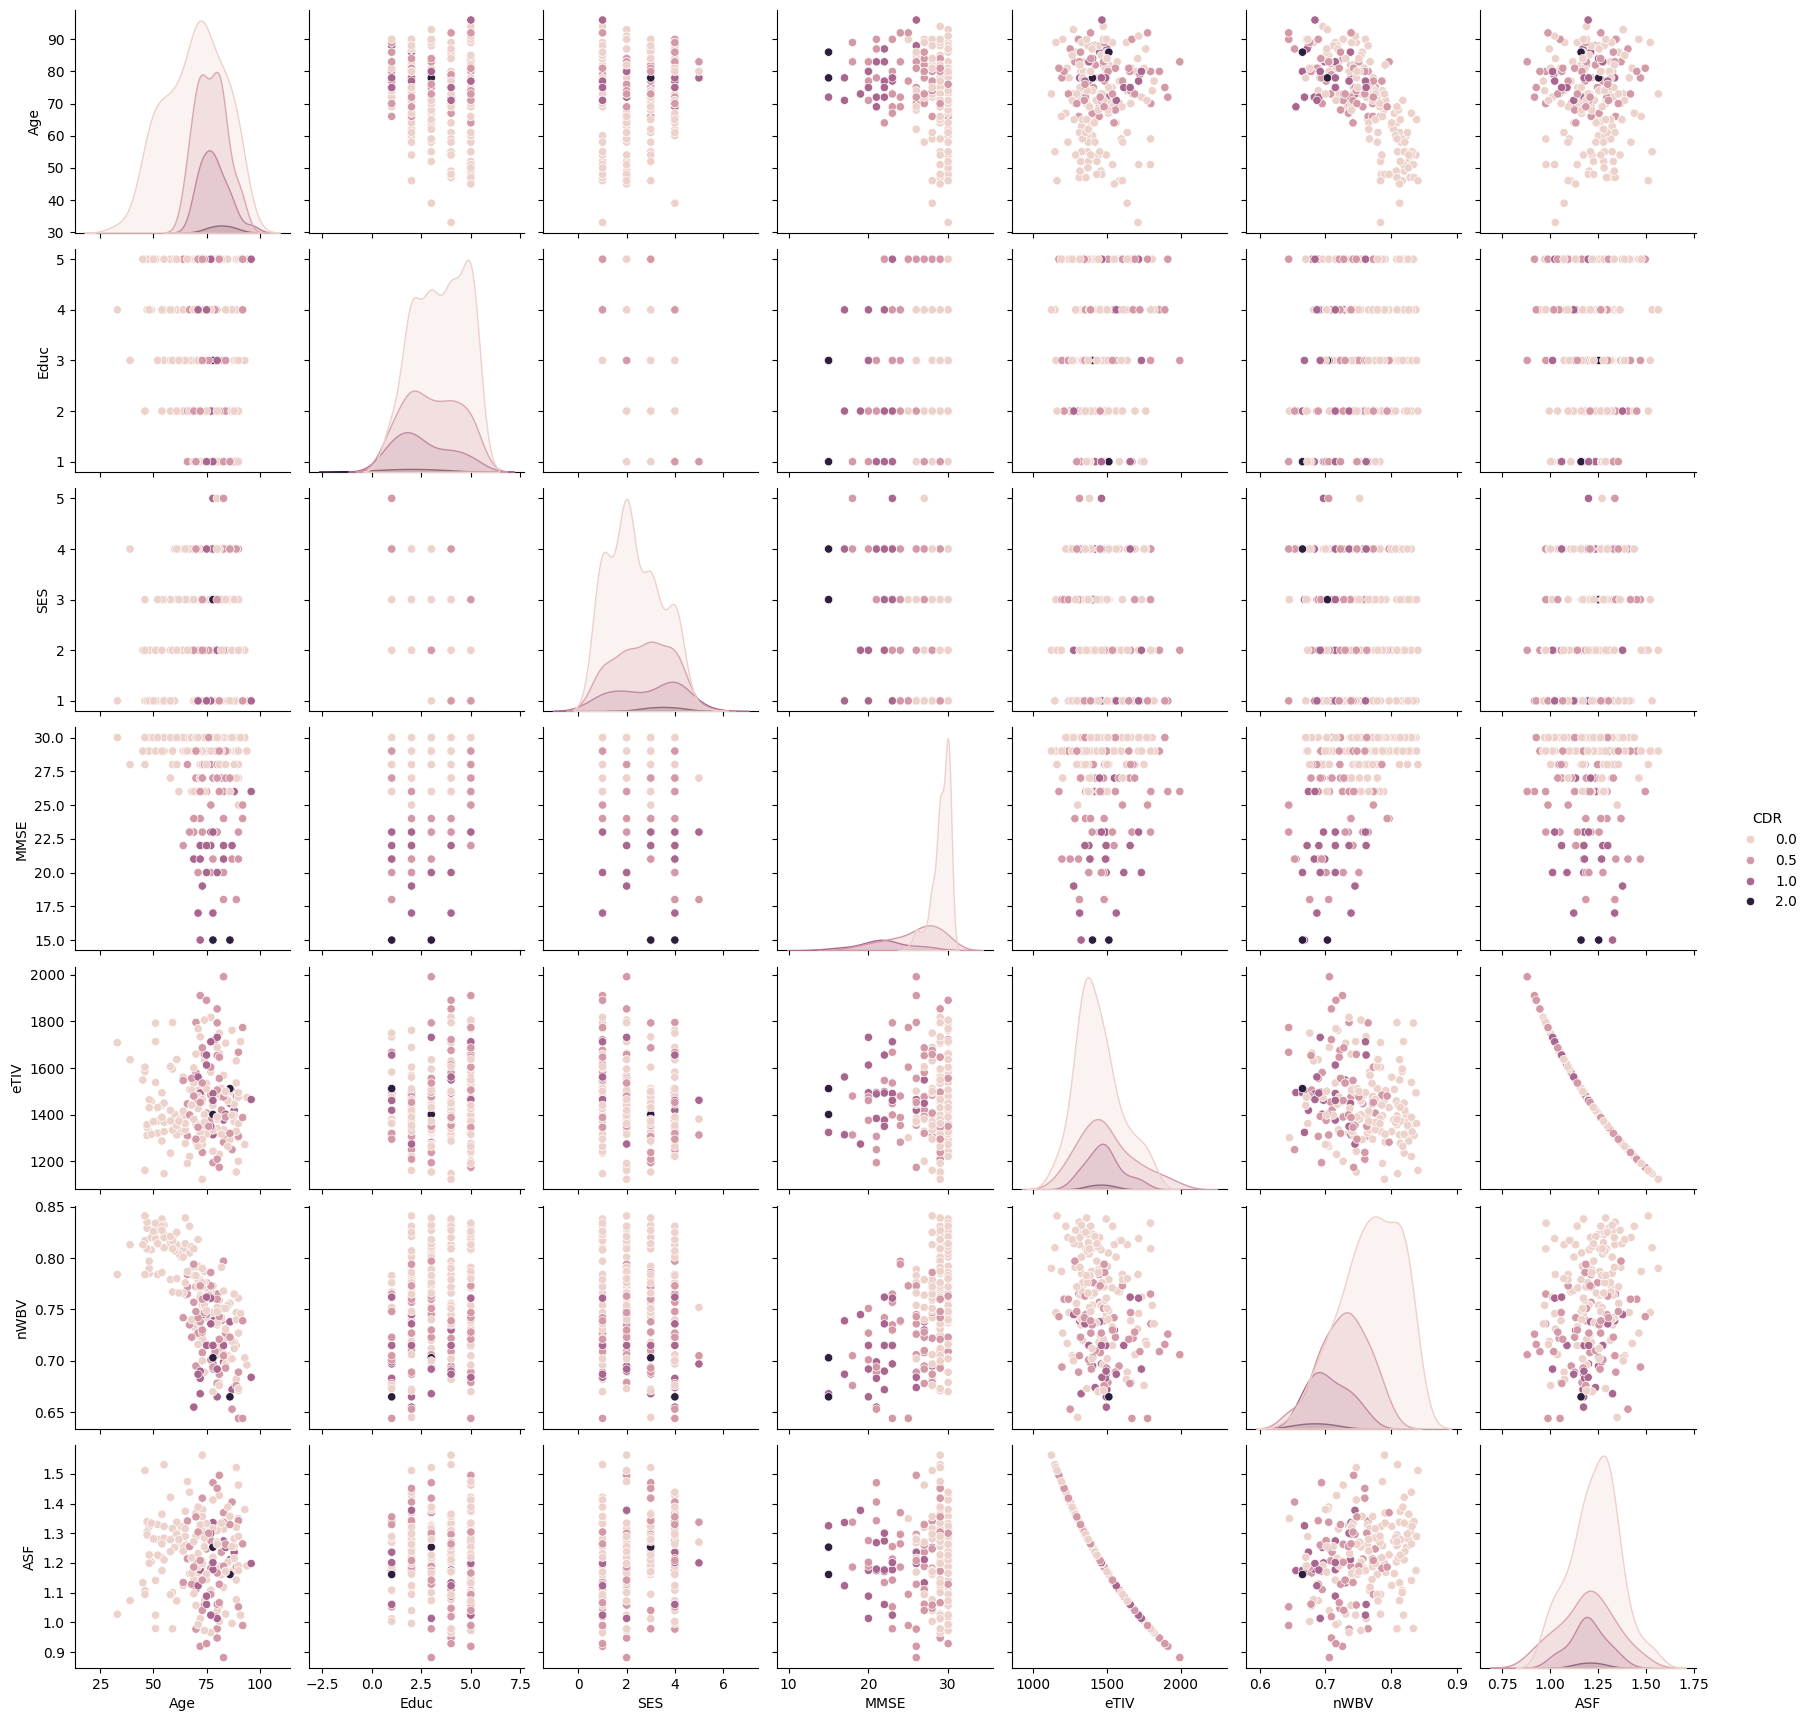

In [21]:
""" Write your code here """
sns.pairplot(df1, hue="CDR", vars=["Age", "Educ", "SES", "MMSE", "eTIV", "nWBV", "ASF"])

* Report the average age of male and female subjects in the cleaned dataset (a nonzero CDR) rounded to 1 decimal place in the format [10 points]
```
The average age of male and female subjects are _ and _ respectively
```

In [ ]:
""" Write your code here """
dementiaDf = df1[df1["CDR"] > 0] # subjects with nonzero CDR
MF = dementiaDf.groupby('M/F').mean(numeric_only=True)

print(f"The average age of male and female subjects are {MF.loc['M','Age']:0.1f} and {MF.loc['F','Age']:0.1f}, respectively")

           Age      Educ       SES       MMSE       CDR         eTIV  \
M/F                                                                    
F    78.081633  2.632653  2.938776  24.020408  0.704082  1422.714286   
M    76.882353  3.264706  2.470588  25.147059  0.647059  1585.500000   

         nWBV       ASF  
M/F                      
F    0.721490  1.244408  
M    0.719206  1.118088  
The average age of male and female subjects are 76.9 and 78.1, respectively


* Report the percentage of male and female subjects in the cleaned dataset with dementia (a CDR > 0) rounded to 1 decimal place in the format [10 points]
```
_ % of male and _ % of female subjects have dementia
```

In [27]:
""" Write your code here """

male = df1[df1['M/F'] == 'M']
female = df1[df1['M/F'] == 'F']

numMaleDementia = sum(male['CDR'] > 0)
numFemaleDementia = sum(female['CDR'] > 0)

print(f"{(numMaleDementia/len(male)*100):0.1f}% of male and {(numFemaleDementia/len(female)*100):0.1f}% of female subjects have dementia")

47.9% of male and 33.8% of female subjects have dementia
